In [1]:
import matplotlib.pyplot as plt
import scipy
from scipy.stats import multivariate_normal
import numpy as np

# Part 3 Isocontours

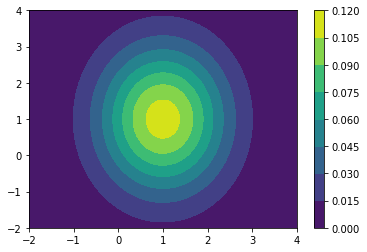

In [37]:
#plot1
x = np.linspace(-2, 4, 500)
y = np.linspace(-2, 4, 500) 
X,Y = np.meshgrid(x, y)
pos = np.array([Y, X]).T
rv = scipy.stats.multivariate_normal([1, 1], [[1, 0], [0, 2]])
Z = rv.pdf(pos)
plt.contourf(X, Y, Z) 
plt.colorbar()
plt.show()

\pagebreak

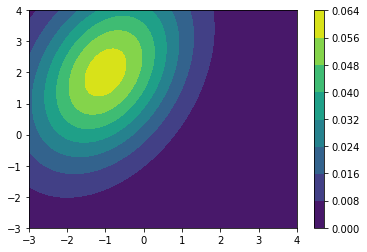

In [40]:
#plot2
x = np.linspace(-3, 4, 500)
y = np.linspace(-3, 4, 500) 
X,Y = np.meshgrid(x, y)
pos = np.array([Y, X]).T
rv = scipy.stats.multivariate_normal([-1, 2], [[2, 1], [1, 4]])
Z = rv.pdf(pos)
plt.contourf(X, Y, Z) 
plt.colorbar()
plt.show()

\pagebreak

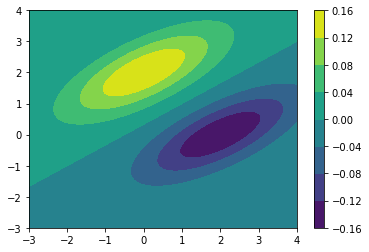

In [44]:
#plot3
x = np.linspace(-3, 4, 500)
y = np.linspace(-3, 4, 500) 
X,Y = np.meshgrid(x, y)
pos = np.array([Y, X]).T
rv1 = scipy.stats.multivariate_normal([0, 2], [[2, 1], [1, 1]])
rv2 = scipy.stats.multivariate_normal([2, 0], [[2, 1], [1, 1]]) 
Z = rv1.pdf(pos) - rv2.pdf(pos)
plt.contourf(X, Y, Z)
plt.colorbar() 
plt.show()

\pagebreak

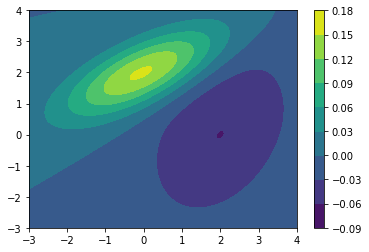

In [45]:
#plot4
x = np.linspace(-3, 4, 500)
y = np.linspace(-3, 4, 500) 
X,Y = np.meshgrid(x, y)
pos = np.array([Y, X]).T
rv1 = scipy.stats.multivariate_normal([0, 2], [[2, 1], [1, 1]])
rv2 = scipy.stats.multivariate_normal([2, 0], [[2, 1], [1, 4]]) 
Z = rv1.pdf(pos) - rv2.pdf(pos)
plt.contourf(X, Y, Z)
plt.colorbar() 
plt.show()

\pagebreak

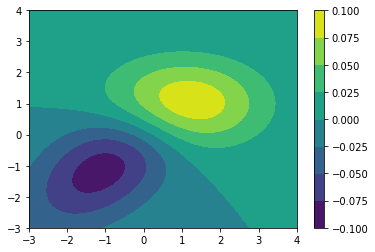

In [46]:
#plot5
x = np.linspace(-3, 4, 500)
y = np.linspace(-3, 4, 500) 
X,Y = np.meshgrid(x, y)
pos = np.array([Y, X]).T
rv1 = scipy.stats.multivariate_normal([1, 1], [[2, 0], [0, 1]])
rv2 = scipy.stats.multivariate_normal([-1, -1], [[2, 1], [1, 2]]) 
Z = rv1.pdf(pos) - rv2.pdf(pos)
plt.contourf(X, Y, Z)
plt.colorbar() 
plt.show()

\pagebreak

# Part 4 eigenvectors of covariance matrix

In [47]:
np.random.seed(88)
X1=np.random.normal(3, 3, 100)
rv=np.random.normal(4, 2, 100)
X2=0.5*X1+rv

In [48]:
# a)
mean=[np.mean(X1),np.mean(X2)]
mean

[2.9141425732900803, 5.2740745643578615]

\pagebreak

In [49]:
# b)
np.cov(X1,X2)

array([[ 6.57557497,  3.31761025],
       [ 3.31761025,  5.8871805 ]])

\pagebreak

In [50]:
# c)
from numpy import linalg as LA
eig_values, eig_vectors=LA.eig(np.cov(X1,X2))
eig_values

array([ 9.56679518,  2.89596029])

In [51]:
eigen_vectors=eig_vectors.T
eigen_vectors

array([[ 0.74269598,  0.66962876],
       [-0.66962876,  0.74269598]])

\pagebreak

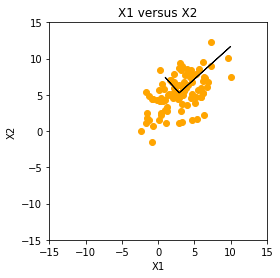

In [52]:
# d)
plt.scatter(X1, X2, c='orange');
plt.xlim(-15, 15);
plt.ylim(-15, 15);
plt.gca().set_aspect('equal', adjustable='box');
plt.title('X1 versus X2');
plt.xlabel('X1');
plt.ylabel('X2');

plt.arrow(mean[0], mean[1],eig_values[0]*eigen_vectors[0][0],eig_values[0]*eigen_vectors[0][1]);
plt.arrow(mean[0], mean[1],eig_values[1]*eigen_vectors[1][0],eig_values[1]*eigen_vectors[1][1]) ;
plt.show()

\pagebreak

In [53]:
# e)
U=eigen_vectors.T
X=np.array([X1-mean[0],X2-mean[1]])
U
rotated=U.T@X

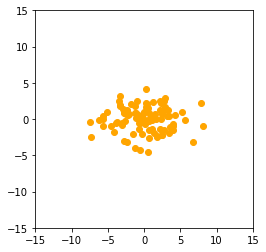

In [54]:
plt.scatter(rotated[0], rotated[1], c='orange');
plt.xlim(-15, 15);
plt.ylim(-15, 15);
plt.gca().set_aspect('equal', adjustable='box');
plt.show()

\pagebreak

### Part 8 Gaussian classifiers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import svm
from scipy import io
mnist=io.loadmat('data/mnist_data.mat')
spam=io.loadmat('data/spam_data.mat')

In [3]:
mnist

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Dec 18 20:13:05 2018',
 '__version__': '1.0',
 'test_data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'training_data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'training_labels': array([[5],
        [0],
        [4],
        ..., 
        [5],
        [6],
        [8]], dtype=uint8)}

In [4]:
# 1)
from numpy import linalg as LA
#normalizing with l2 norm
mnist_train=pd.DataFrame(mnist['training_data']/LA.norm(mnist['training_data'], axis=1,keepdims = True))
mnist_test=pd.DataFrame(mnist['test_data']/LA.norm(mnist['test_data'], axis=1,keepdims = True))
labels_mnist=np.unique(mnist['training_labels'])
labels_mnist

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
mnist_train['label']=mnist['training_labels']

In [6]:
# compute mean and covariance matrix for each digit class
class_mean_var={}
pi=[]
for label in labels_mnist:
    indices = mnist_train['label'] == label
    pi.append(sum(indices)/len(mnist_train['label']))
    train=mnist_train.drop(['label'],axis=1)
    data=train[indices]
    mean=np.mean(data,axis=0)
    cov=np.cov(data, rowvar=False)
    class_mean_var[label]=(mean, cov)

\pagebreak

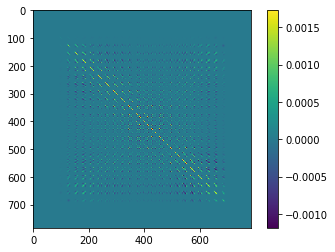

In [7]:
# 2)
plt.imshow(class_mean_var[0][1])
plt.colorbar()
plt.show()
# From this plot, we can observe that variance for the diagonal terms are larger than 
# non-diagonal terms. As move away from the diagonal,covaraince becomes smaller 
# in terms of absolute magnitude. This makes sense becase neiboring pixels 
# have similar information, hence larger covariance/correlation. 

\pagebreak

In [8]:
# 3)

# a)
from scipy.stats import multivariate_normal
def LDA_train(X):
    class_mean_var={}
    pi=[]
    for label in labels_mnist:
        indices = X['label'] == label
        pi.append(sum(indices)/len(X['label']))
        train=X.drop(['label'],axis=1)
        data=train[indices]
        mean=np.mean(data,axis=0)
        cov=np.cov(data, rowvar=False)
        cov+=0.0001*np.identity(784)
        class_mean_var[label]=(mean, cov)
    # calculate averaged cov
    shared_cov=class_mean_var[0][1]
    for i in range(1,10):
        shared_cov+=class_mean_var[i][1]
    shared_cov=shared_cov/10
    return (class_mean_var, shared_cov,pi)

In [9]:
from numpy import linalg as LA
# avoid calculating sigma inverse
def multinormal_pdf(X, mean, cov):
    return -0.5*np.diag((X-mean)@LA.solve(cov, (X-mean).T))


In [10]:
def LDA_classifier(X, class_mean_var, shared_cov, pi):
    pred=[]
    #score=[multivariate_normal.logpdf(X, mean=class_mean_var[i][0], cov=shared_cov)+np.log(pi[i]) for i in range(0,10)]
    score=[multinormal_pdf(X, mean=class_mean_var[i][0], cov=shared_cov)
           +np.log(pi[i]) for i in range(0,10)]
    return np.argmax(score, axis=0)
        
        

In [11]:
def evaluation(pred, true):
    return sum(pred==true)/len(pred)

In [13]:
mnist_training=mnist_train.sample(frac=5/6,random_state=100)#random state is a seed value
mnist_validation=mnist_train.drop(mnist_training.index)
accuracy_validation=[]
accuracy_train=[]
for i in [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]:
    train=mnist_training.sample(frac=i/50000,random_state=200)
    class_mean_var,shared_cov,pi=LDA_train(train)
    pred_validation=LDA_classifier(mnist_validation.drop(['label'],axis=1), class_mean_var, shared_cov, pi)
    pred_train=LDA_classifier(train.drop(['label'],axis=1), class_mean_var, shared_cov, pi)
    print((evaluation(pred_train, train['label']),evaluation(pred_validation,mnist_validation['label'])))
    accuracy_train.append(evaluation(pred_train, train['label']))
    accuracy_validation.append(evaluation(pred_validation,mnist_validation['label'] ))
    

(1.0, 0.71609999999999996)
(1.0, 0.72989999999999999)
(0.998, 0.80149999999999999)
(0.97299999999999998, 0.82410000000000005)
(0.93400000000000005, 0.84940000000000004)
(0.90080000000000005, 0.86460000000000004)
(0.89359999999999995, 0.86739999999999995)
(0.88600000000000001, 0.87339999999999995)
(0.88302000000000003, 0.87229999999999996)


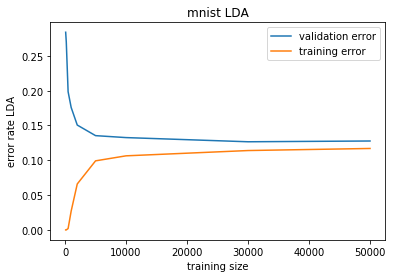

In [15]:
training_size=[100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
performance=pd.DataFrame(training_size,columns=['training size'])
performance['error rate LDA']=np.ones(9)-accuracy_validation
plt.plot(performance['training size'],performance['error rate LDA'],label='validation error')
plt.plot(performance['training size'],np.ones(9)-accuracy_train,label='training error')
plt.plot
plt.xlabel('training size')
plt.ylabel('error rate LDA')
plt.title('mnist LDA')
plt.legend()
plt.show()

In [16]:
# b)
def QDA_train(X):
    class_mean_var={}
    pi=[]
    for label in labels_mnist:
        indices = X['label'] == label
        pi.append(sum(indices)/len(X['label']))
        train=X.drop(['label'],axis=1)
        data=train[indices]
        mean=np.mean(data,axis=0)
        cov=np.cov(data, rowvar=False)
        cov+=0.0001*np.identity(784)
        '''
        if not
        \is_invertible(cov):
            while not is_invertible(cov):
                cov+=0.00001*np.identity(784)
        '''
        class_mean_var[label]=(mean, cov)    
    return (class_mean_var,pi)
def QDA_classifier(X, class_mean_var, pi):
    score=[]
    for i in range(0,10):
        score.append(multivariate_normal.logpdf(X, mean=class_mean_var[i][0], cov=class_mean_var[i][1])+np.log(pi[i]))       
    return np.argmax(score, axis=0)


In [17]:
def is_invertible(a):
    return a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0]

In [18]:
accuracy2=[]
accuracy3=[]
for i in [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]:
    train=mnist_training.sample(frac=i/50000,random_state=200)
    class_mean_var, pi=QDA_train(train)
    pred_validation=QDA_classifier(mnist_validation.drop(['label'],axis=1), class_mean_var,pi)
    pred_train=QDA_classifier(train.drop(['label'],axis=1), class_mean_var,pi)
    accuracy2.append(evaluation(pred_validation,mnist_validation['label'] ))
    accuracy3.append(evaluation(pred_train,train['label'] ))
    print((evaluation(pred_train,train['label'] ),evaluation(pred_validation,mnist_validation['label'] )))

(1.0, 0.80430000000000001)
(1.0, 0.83699999999999997)
(1.0, 0.88759999999999994)
(1.0, 0.91149999999999998)
(1.0, 0.92610000000000003)
(0.99919999999999998, 0.93520000000000003)
(0.99170000000000003, 0.93630000000000002)
(0.96673333333333333, 0.93559999999999999)
(0.95855999999999997, 0.93569999999999998)


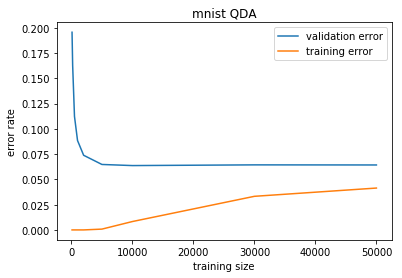

In [20]:
performance['error rate QDA']=np.ones(9)-accuracy2
plt.plot(performance['training size'],performance['error rate QDA'],label='validation error')
plt.plot(performance['training size'],np.ones(9)-accuracy3,label='training error')
plt.xlabel('training size')
plt.ylabel('error rate')
plt.title('mnist QDA')
plt.legend()
plt.show()

In [71]:
# c)
# QDA performs better in this case because it has larger degree of freedoms,
# hence more expressive, but it has a chance of overfitting. 

In [354]:
# d)
class_mean_var, pi=QDA_train(mnist_train)
pred=QDA_classifier(mnist_test, class_mean_var,pi)

In [10]:
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='Id')

In [356]:
results_to_csv(pred)

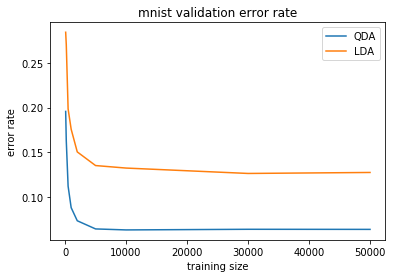

In [73]:
plt.plot(performance['training size'],performance['error rate QDA'],label='QDA')
plt.plot(performance['training size'],performance['error rate LDA'],label='LDA')
plt.xlabel('training size')
plt.ylabel('error rate')
plt.title('mnist validation error rate')
plt.legend()
plt.show()

In [357]:
## I draw both LDA, QDA graphs, but QDA is my best classifier
np.random.seed(189)
mnist_training=mnist_train.sample(frac=5/6,random_state=200)#random state is a seed value
mnist_validation=mnist_train.drop(mnist_training.index)
accuracy=[]
for c in range(10):
    sub=[]
    for i in [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]:
        train=mnist_training.sample(frac=i/50000,random_state=200)
        class_mean_var,shared_cov,pi=LDA_train(train)
        pred=LDA_classifier(mnist_validation[mnist_validation['label']==c].drop(['label'],axis=1), class_mean_var, shared_cov, pi)
        sub.append(evaluation(pred,mnist_validation[mnist_validation['label']==c]['label'] ))
    accuracy.append(sub)

In [358]:
accuracy[0]

[0.85741626794258374,
 0.86028708133971288,
 0.90430622009569372,
 0.95502392344497611,
 0.94641148325358848,
 0.94736842105263153,
 0.94832535885167468,
 0.94449760765550239,
 0.94354066985645935]

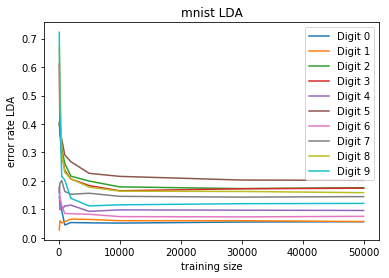

In [359]:
plt.plot(performance['training size'],np.ones(9)-accuracy[0],label='Digit 0')
plt.plot(performance['training size'],np.ones(9)-accuracy[1],label='Digit 1')
plt.plot(performance['training size'],np.ones(9)-accuracy[2],label='Digit 2')
plt.plot(performance['training size'],np.ones(9)-accuracy[3],label='Digit 3')
plt.plot(performance['training size'],np.ones(9)-accuracy[4],label='Digit 4')
plt.plot(performance['training size'],np.ones(9)-accuracy[5],label='Digit 5')
plt.plot(performance['training size'],np.ones(9)-accuracy[6],label='Digit 6')
plt.plot(performance['training size'],np.ones(9)-accuracy[7],label='Digit 7')
plt.plot(performance['training size'],np.ones(9)-accuracy[8],label='Digit 8')
plt.plot(performance['training size'],np.ones(9)-accuracy[9],label='Digit 9')

plt.xlabel('training size')
plt.ylabel('error rate LDA')
plt.title('mnist LDA')
plt.legend()
plt.show()

## digit 0 is easiest to classify.

In [360]:
np.random.seed(189)
mnist_training=mnist_train.sample(frac=5/6,random_state=200)#random state is a seed value
mnist_validation=mnist_train.drop(mnist_training.index)
accuracy=[]
for c in range(10):
    sub=[]
    for i in [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]:
        train=mnist_training.sample(frac=i/50000,random_state=200)
        class_mean_var,pi=QDA_train(train)
        pred=QDA_classifier(mnist_validation[mnist_validation['label']==c].drop(['label'],axis=1), class_mean_var, pi)
        sub.append(evaluation(pred,mnist_validation[mnist_validation['label']==c]['label'] ))
    accuracy.append(sub)

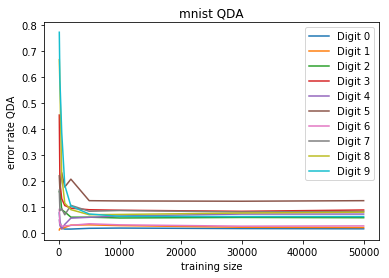

In [361]:
plt.plot(performance['training size'],np.ones(9)-accuracy[0],label='Digit 0')
plt.plot(performance['training size'],np.ones(9)-accuracy[1],label='Digit 1')
plt.plot(performance['training size'],np.ones(9)-accuracy[2],label='Digit 2')
plt.plot(performance['training size'],np.ones(9)-accuracy[3],label='Digit 3')
plt.plot(performance['training size'],np.ones(9)-accuracy[4],label='Digit 4')
plt.plot(performance['training size'],np.ones(9)-accuracy[5],label='Digit 5')
plt.plot(performance['training size'],np.ones(9)-accuracy[6],label='Digit 6')
plt.plot(performance['training size'],np.ones(9)-accuracy[7],label='Digit 7')
plt.plot(performance['training size'],np.ones(9)-accuracy[8],label='Digit 8')
plt.plot(performance['training size'],np.ones(9)-accuracy[9],label='Digit 9')

plt.xlabel('training size')
plt.ylabel('error rate QDA')
plt.title('mnist QDA')
plt.legend()
plt.show()
# Digit 0 is easiest to classify here.

\pagebreak

In [15]:
# 4)
# I add several features to the matrix such as number of Re, 
# number of foward, number of subscribe. 
spam_train=pd.DataFrame(spam['training_data'])
spam_test=pd.DataFrame(spam['test_data'])
for i in range(5857):
    spam_test.iloc[i]=(spam_test.iloc[i]-np.mean(spam_test.iloc[i]))/np.std(spam_test.iloc[i])
labels=np.unique(spam['training_labels'])
for i in range(5172):
    spam_train.iloc[i]=(spam_train.iloc[i]-np.mean(spam_train.iloc[i]))/np.std(spam_train.iloc[i])
spam_train['label']=spam['training_labels']
spam_train=spam_train.dropna().reset_index(drop=True)
spam_train.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,label
0,-0.353553,-0.353553,-0.353553,-0.353553,-0.353553,-0.353553,-0.353553,-0.353553,-0.353553,-0.353553,...,-0.353553,-0.353553,-0.353553,-0.353553,-0.353553,-0.353553,2.828427,-0.353553,2.828427,1
1,-0.215666,-0.215666,-0.215666,4.636809,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,...,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,1
2,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,...,4.636809,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,1
3,-0.311338,-0.311338,-0.311338,-0.311338,-0.311338,-0.311338,-0.311338,-0.311338,-0.311338,-0.311338,...,0.227516,-0.311338,-0.311338,0.227516,0.227516,-0.311338,0.227516,-0.311338,0.227516,1
4,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,...,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,-0.215666,4.636809,1


In [16]:
def QDA_train(X):
    class_mean_var={}
    pi=[]
    for label in labels:
        indices = X['label'] == label
        pi.append(sum(indices)/len(X['label']))
        train=X.drop(['label'],axis=1)
        data=train[indices]
        mean=np.mean(data,axis=0)
        cov=np.cov(data, rowvar=False)
        cov+=0.01*np.identity(data.shape[1])
        '''
        if not
        \is_invertible(cov):
            while not is_invertible(cov):
                cov+=0.00001*np.identity(784)
        '''
        class_mean_var[label]=(mean, cov)    
    return (class_mean_var,pi)
def QDA_classifier(X, class_mean_var, pi):
    score=[]
    for i in range(0,2):
        score.append(multivariate_normal.logpdf(X, mean=class_mean_var[i][0], cov=class_mean_var[i][1])+np.log(pi[i]))
        
    return np.argmax(score, axis=0)


In [17]:
np.random.seed(2)
spam_training=spam_train.sample(frac=5/6,random_state=200)#random state is a seed value
spam_validation=spam_train.drop(spam_training.index)
spam_accuracy=[]
for i in [100, 200, 500, 1000, 2000, 3000]:
    train=spam_training.sample(frac=i/4229,random_state=200)
    class_mean_var, pi=QDA_train(train)
    pred=QDA_classifier(spam_validation.drop(['label'],axis=1), class_mean_var,pi)
    spam_accuracy.append(evaluation(pred,spam_validation['label'] ))
print(spam_accuracy)

[0.80645161290322576, 0.85548387096774192, 0.86193548387096774, 0.87483870967741939, 0.85419354838709682, 0.85032258064516131]


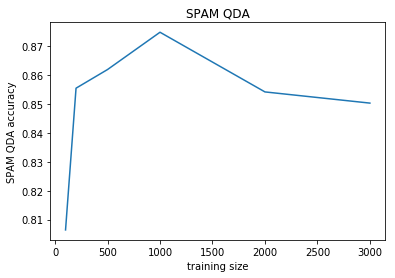

In [21]:
plt.plot([100, 200, 500, 1000, 2000, 3000],spam_accuracy)
plt.xlabel('training size')
plt.ylabel('SPAM QDA accuracy')
plt.title('SPAM QDA')
plt.show()

In [19]:
class_mean_var, pi=QDA_train(spam_train)
pred_spam=QDA_classifier(spam_test, class_mean_var,pi)
results_to_csv(pred_spam)